## EDA Dataset sobre la ansiedad (Gaming)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("../../data/raw/GamingStudy_data.csv", delimiter=',',encoding='unicode_escape')
df.head(3)

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. No.           13464 non-null  int64  
 1   Timestamp        13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  SWL1             13464 non-null  int64  
 11  SWL2             13464 non-null  int64  
 12  SWL3             13464 non-null  int64  
 13  SWL4             13464 non-null  int64  
 14  SWL5             13464 non-null  int64  
 15  Game             13464 non-null  object 
 16  Platform         13464 non-null  object 
 17  Hours       

In [29]:
df['Platform'].value_counts()

Platform
PC                         13219
Console (PS, Xbox, ...)      222
Smartphone / Tablet           23
Name: count, dtype: int64

In [28]:
print(df.columns.tolist())

['S. No.', 'Timestamp', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GADE', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game', 'Platform', 'Hours', 'earnings', 'whyplay', 'League', 'highestleague', 'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Narcissism', 'Gender', 'Age', 'Work', 'Degree', 'Birthplace', 'Residence', 'Reference', 'Playstyle', 'accept', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3', 'Birthplace_ISO3']


## Columnas numericas

In [19]:
numeric_columns = df.select_dtypes(include=['float', 'int'])
numeric_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   S. No.         13464 non-null  int64  
 1   Timestamp      13464 non-null  float64
 2   GAD1           13464 non-null  int64  
 3   GAD2           13464 non-null  int64  
 4   GAD3           13464 non-null  int64  
 5   GAD4           13464 non-null  int64  
 6   GAD5           13464 non-null  int64  
 7   GAD6           13464 non-null  int64  
 8   GAD7           13464 non-null  int64  
 9   SWL1           13464 non-null  int64  
 10  SWL2           13464 non-null  int64  
 11  SWL3           13464 non-null  int64  
 12  SWL4           13464 non-null  int64  
 13  SWL5           13464 non-null  int64  
 14  Hours          13434 non-null  float64
 15  highestleague  0 non-null      float64
 16  streams        13364 non-null  float64
 17  SPIN1          13340 non-null  float64
 18  SPIN2 

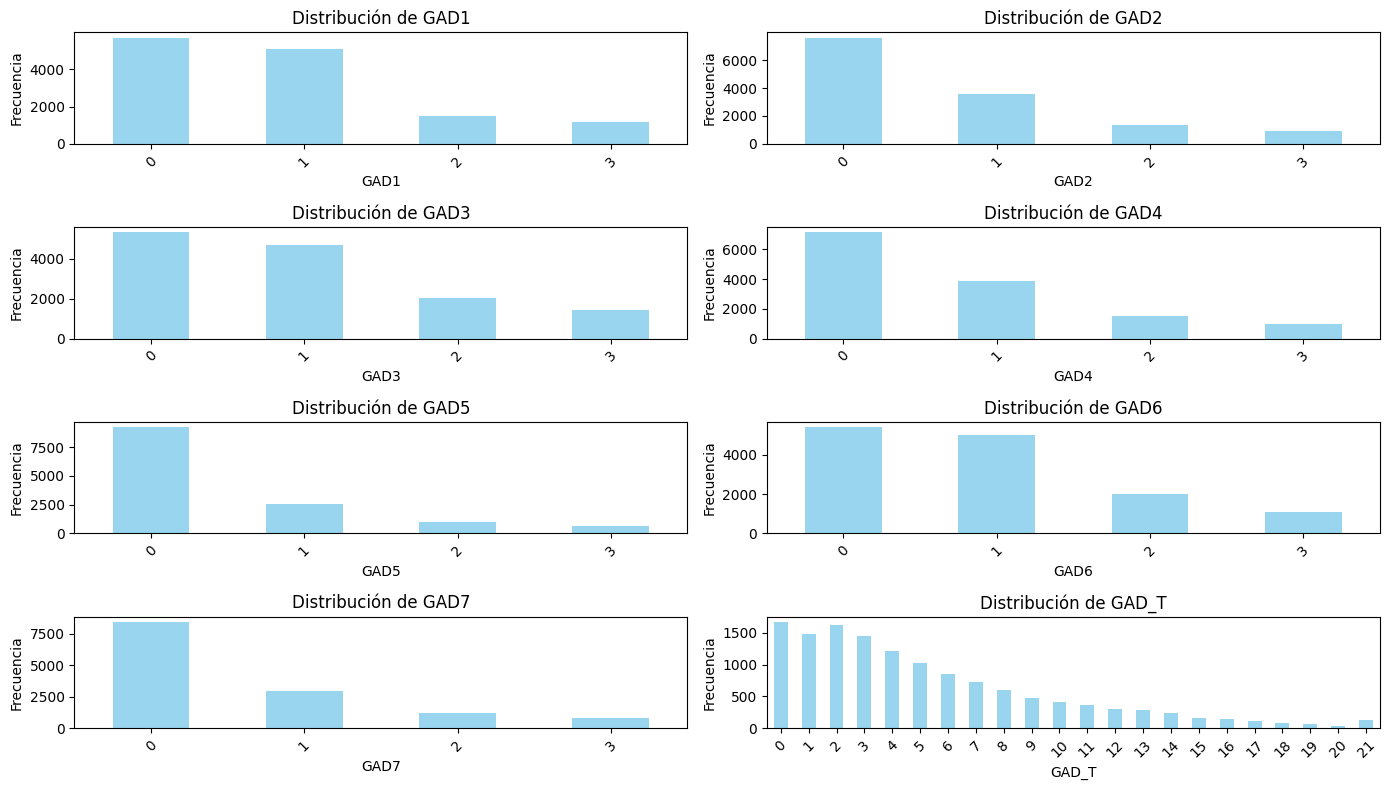

In [23]:
# Supongamos que quieres graficar estas columnas específicas
columns_to_plot = ['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GAD_T']  # Reemplaza con tus columnas específicas

# Crear las gráficas de a dos por fila
fig, axes = plt.subplots(nrows=(len(columns_to_plot) + 1) // 2, ncols=2, figsize=(14, 8))  # Ajustar tamaño general

# Aplanar los ejes en caso de múltiples filas
axes = axes.flatten()

# Iterar sobre las columnas y sus posiciones en los ejes
for i, col in enumerate(columns_to_plot):
    if col in numeric_columns:  # Asegúrate de que la columna está en las numéricas
        numeric_columns[col].value_counts().sort_index().plot(
            kind='bar', ax=axes[i], color='skyblue', alpha=0.85
        )
        axes[i].set_title(f'Distribución de {col}', fontsize=12)
        axes[i].set_xlabel(col, fontsize=10)
        axes[i].set_ylabel('Frecuencia', fontsize=10)
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].set_visible(False)  # Oculta los ejes no usados si la columna no es válida

# Ocultar ejes extra si no hay suficientes columnas para completar la cuadrícula
for j in range(len(columns_to_plot), len(axes)):
    axes[j].set_visible(False)

# Ajustar espacio entre gráficos
plt.tight_layout()

# Mostrar las gráficas
plt.show()

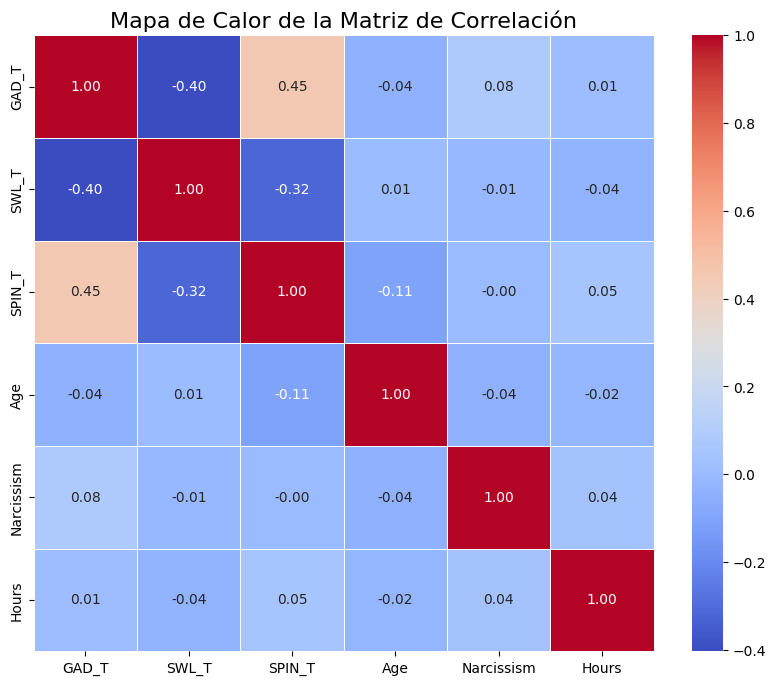

In [27]:
columns_to_plot = ['GAD_T', 'SWL_T', 'SPIN_T', 'Age', 'Narcissism', 'Hours']
cols = df[columns_to_plot]
# Crear una matriz de correlación solo con las columnas numéricas
correlation_matrix = cols.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)

# Título del mapa de calor
plt.title("Mapa de Calor de la Matriz de Correlación", fontsize=16)

# Mostrar el gráfico
plt.show()